In [1]:
# Standard imports
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as pp
import seaborn as sns

In [2]:
# Reading the file
df = pd.read_csv('C:/Users/sigsp/OneDrive/Desktop/D206 Data Cleaning/churn_raw_data.csv')

In [3]:
# Dropping duplicates & checking for changes
print(df.shape)
df.drop_duplicates(inplace=True)
print(df.shape)

(10000, 52)
(10000, 52)


In [4]:
# Reviewing columns, nulls, and datatypes
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 52 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            10000 non-null  int64  
 1   CaseOrder             10000 non-null  int64  
 2   Customer_id           10000 non-null  object 
 3   Interaction           10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  Timezone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              7505 non-null   float64
 15  Age                 

In [5]:
# Prepping columns: Dropping Unnamed: 0 column, setting index, renaming item1 to item8 columns
df.drop(columns='Unnamed: 0', inplace=True)
df.set_index('CaseOrder', inplace=True)
survey_dict = {'item1': 'Response',
               'item2': 'Fix',
               'item3': 'Replacement',
               'item4': 'Reliability',
               'item5': 'Options',
               'item6': 'Respectful',
               'item7': 'Courteous',
               'item8': 'Listening'}

df.rename(columns=survey_dict, inplace=True)

<AxesSubplot:ylabel='CaseOrder'>

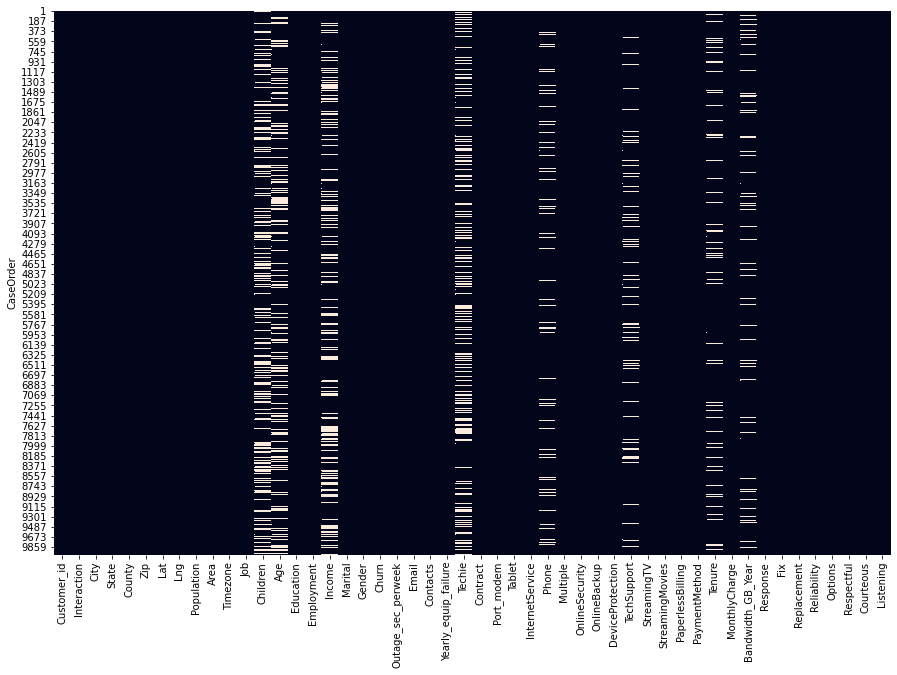

In [6]:
# Heatmap to visualize location of null values.
fig, ax = pp.subplots(figsize=(15,10))
sns.heatmap(df.isnull(), xticklabels=1, cbar=False, ax=ax)

In [7]:
# Dropping rows with > 75% missing data
nullThresh = df.shape[1]*0.75
df.dropna(thresh=nullThresh, inplace=True)
print(df.shape)

(10000, 50)


In [8]:
# The following columns have null values that must be addressed:
# Children, Age, Income, Techie, Phone, TechSupport, Tenure, Bandwith_GB_Year

The maximum value in the Children column is  10.0
The minimum value in the Children column is  0.0
The arithmetic mean value in the Children column is  2.095936042638241
The median value in the Children column is  1.0


(array([1919., 1874., 1100., 1096.,  769.,  161.,  135.,  149.,  158.,
         144.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

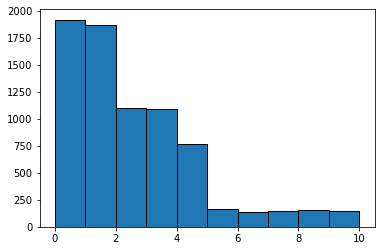

In [9]:
# Analyzing Children variable
maxChild = np.nanmax(df.Children)
minChild = np.nanmin(df.Children)
avgChild = np.nanmean(df.Children)
medChild = np.nanmedian(df.Children)
print("The maximum value in the Children column is ", maxChild)
print("The minimum value in the Children column is ", minChild)
print("The arithmetic mean value in the Children column is ", avgChild)
print("The median value in the Children column is ", medChild)
pp.hist(df.Children, edgecolor='black')

In [10]:
# Imputing using the median & confirming no nulls remain
df.Children.fillna(medChild, inplace=True)
print(df.Children.isnull().any())

False


The maximum value in the Age column is  89.0
The minimum value in the Age column is  18.0
The arithmetic mean value in the Age column is  53.27574750830565
The median value in the Age column is  53.0


(array([528., 544., 537., 411., 525., 517., 514., 416., 517., 527., 528.,
        401., 543., 528., 489.]),
 array([18.        , 22.73333333, 27.46666667, 32.2       , 36.93333333,
        41.66666667, 46.4       , 51.13333333, 55.86666667, 60.6       ,
        65.33333333, 70.06666667, 74.8       , 79.53333333, 84.26666667,
        89.        ]),
 <BarContainer object of 15 artists>)

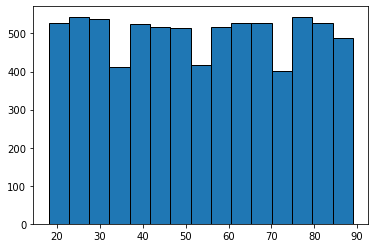

In [11]:
# Analyzing the Age variable
maxAge = np.nanmax(df.Age)
minAge = np.nanmin(df.Age)
avgAge = np.nanmean(df.Age)
medAge = np.nanmedian(df.Age)
print("The maximum value in the Age column is ", maxAge)
print("The minimum value in the Age column is ", minAge)
print("The arithmetic mean value in the Age column is ", avgAge)
print("The median value in the Age column is ", medAge)
pp.hist(df.Age, bins=15, edgecolor='black')

In [12]:
# Imputing using the median & confirming no nulls remain.
df.Age.fillna(medAge, inplace=True)
print(df.Age.isnull().any())

False


The maximum value in the Income column is  258900.7
The minimum value in the Income column is  740.66
The arithmetic mean value in the Income column is  39936.76222636485
The median value in the Income column is  33186.785


(array([243., 533., 684., 721., 731., 660., 606., 510., 461., 405., 338.,
        265., 227., 200., 163., 156., 124.,  80.,  83.,  65.,  41.,  39.,
         38.,  26.,  23.,  17.,  14.,   8.,  16.,   5.,   8.,   6.,   3.,
          4.,   0.,   2.,   1.,   1.,   0.,   0.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   2.]),
 array([   740.66  ,   5903.8608,  11067.0616,  16230.2624,  21393.4632,
         26556.664 ,  31719.8648,  36883.0656,  42046.2664,  47209.4672,
         52372.668 ,  57535.8688,  62699.0696,  67862.2704,  73025.4712,
         78188.672 ,  83351.8728,  88515.0736,  93678.2744,  98841.4752,
        104004.676 , 109167.8768, 114331.0776, 119494.2784, 124657.4792,
        129820.68  , 134983.8808, 140147.0816, 145310.2824, 150473.4832,
        155636.684 , 160799.8848, 165963.0856, 171126.2864, 176289.4872,
        181452.688 , 186615.8888, 191779.0896, 196942.2904, 202105.4912,
        207268.692 , 212431.8928, 217595.0936, 222758.2944, 227921.4952,
 

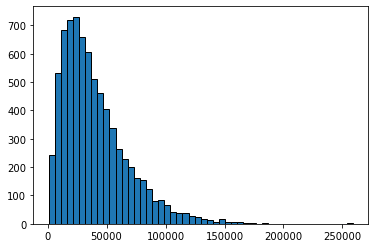

In [13]:
# Analyzing the Income variable.
maxInc = np.nanmax(df.Income)
minInc = np.nanmin(df.Income)
avgInc = np.nanmean(df.Income)
medInc = np.nanmedian(df.Income)
print("The maximum value in the Income column is ", maxInc)
print("The minimum value in the Income column is ", minInc)
print("The arithmetic mean value in the Income column is ", avgInc)
print("The median value in the Income column is ", medInc)
pp.hist(df.Income, bins=50, edgecolor='black')

In [14]:
# Histogram is heavily skewed right with visible outliers. Further analysis is required.

In [15]:
# Identifying & analyzing outliers
df['Income_z'] = stats.zscore(df['Income'], nan_policy='omit')
income_outliers = df.query('Income_z > 3 | Income_z < -3')
income_outliers_sort = income_outliers[['Customer_id', 'Income', 'Income_z']].sort_values(['Income_z'], ascending=False)
print("The percentage of outliers in the data set is", len(income_outliers)/df.shape[0]*100)

The percentage of outliers in the data set is 1.0999999999999999


The filtered maximum value in the Income column is  124735.8
The filtered minimum value in the Income column is  740.66
The filtered arithmetic mean value in the Income column is  38344.443281081076
The filtered median value in the Income column is  32769.490000000005


(array([ 71., 156., 215., 287., 320., 334., 332., 342., 342., 373., 335.,
        317., 303., 296., 285., 235., 217., 241., 207., 197., 185., 165.,
        156., 133., 115., 110., 108., 105.,  90.,  84.,  71.,  76.,  83.,
         72.,  54.,  36.,  44.,  36.,  37.,  46.,  27.,  24.,  20.,  16.,
         18.,  24.,  19.,  15.,  15.,  11.]),
 array([   740.66  ,   3220.5628,   5700.4656,   8180.3684,  10660.2712,
         13140.174 ,  15620.0768,  18099.9796,  20579.8824,  23059.7852,
         25539.688 ,  28019.5908,  30499.4936,  32979.3964,  35459.2992,
         37939.202 ,  40419.1048,  42899.0076,  45378.9104,  47858.8132,
         50338.716 ,  52818.6188,  55298.5216,  57778.4244,  60258.3272,
         62738.23  ,  65218.1328,  67698.0356,  70177.9384,  72657.8412,
         75137.744 ,  77617.6468,  80097.5496,  82577.4524,  85057.3552,
         87537.258 ,  90017.1608,  92497.0636,  94976.9664,  97456.8692,
         99936.772 , 102416.6748, 104896.5776, 107376.4804, 109856.3832,
 

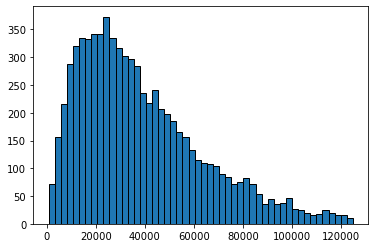

In [16]:
# Removing outliers and recalculating values.
filtered_income = df.drop(df[abs(df['Income_z']) > 3].index)
filteredMaxInc = np.nanmax(filtered_income['Income'])
filteredMinInc = np.nanmin(filtered_income['Income'])
filteredAvgInc = np.nanmean(filtered_income['Income'])
filteredMedInc = np.nanmedian(filtered_income['Income'])
print("The filtered maximum value in the Income column is ", filteredMaxInc)
print("The filtered minimum value in the Income column is ", filteredMinInc)
print("The filtered arithmetic mean value in the Income column is ", filteredAvgInc)
print("The filtered median value in the Income column is ", filteredMedInc)
pp.hist(filtered_income['Income'], bins=50, edgecolor='black')

In [17]:
# Imputing missing values, dropping Income_z column, and confirming changes have been made.
df.Income.fillna(filteredMedInc, inplace=True)
df.drop(columns='Income_z', inplace=True)

print(df.Age.isnull().any())
print(df.shape)

False
(10000, 50)


In [18]:
# Analyzing Techie column.
print(df.Techie.value_counts())
print(df.Techie.isnull().sum())

No     6266
Yes    1257
Name: Techie, dtype: int64
2477


In [19]:
# Dropping column due to large amount of missing data (nearly 25%) & values are self-reported (therefore biased)
# and confirming it has been dropped
print(df.shape)
df.drop(columns='Techie', inplace=True)
print(df.shape)

(10000, 50)
(10000, 49)


In [20]:
# Analyzing the Phone column using the Multiple column.
print("The Phone column contains", df.Phone.isnull().sum(),"missing values.")
print("The Multiple column contains", df.Multiple.isnull().sum(), "missing values.")

The Phone column contains 1026 missing values.
The Multiple column contains 0 missing values.


In [21]:
# Those with Multiple lines have phone service.
# Finding Customer_ids with multiple lines but phone is null & imputing with 'Yes'
phoneNull = df.loc[df['Phone'].isnull()]
phoneNullMultYes = phoneNull.loc[phoneNull['Multiple'] == 'Yes']
filteredPhoneIds = phoneNullMultYes['Customer_id']
df.loc[df.Customer_id.isin(filteredPhoneIds), 'Phone'] = 'Yes'
print("There are", df.Phone.isnull().sum(), "remaining missing values.")

There are 576 remaining missing values.


In [22]:
# Imputing remaining missing values with mode & confirming no nulls remain.
df.Phone.fillna(str(df.Phone.mode()), inplace=True)
print(df.Phone.isnull().any())

False


In [23]:
# Analyzing TechSupport column.
print(df.TechSupport.value_counts())
print(df.TechSupport.isnull().sum())

No     5635
Yes    3374
Name: TechSupport, dtype: int64
991


In [24]:
# Imputing with mode & confirming no nulls remain.
df.TechSupport.fillna(str(df.TechSupport.mode()), inplace=True)
print(df.TechSupport.isnull().any())

False


The maximum value in the Tenure column is  71.99928
The minimum value in the Tenure column is  1.00025934
The arithmetic mean value in the Tenure column is  34.49885764604521
The median value in the Tenure column is  36.19603


(array([3810.,  700.,  251., 1410., 2898.]),
 array([ 1.00025934, 15.20006347, 29.3998676 , 43.59967174, 57.79947587,
        71.99928   ]),
 <BarContainer object of 5 artists>)

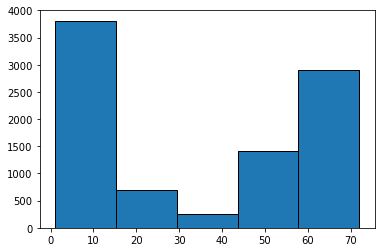

In [25]:
# Analyzing Tenure column.
maxTenure = np.nanmax(df['Tenure'])
minTenure = np.nanmin(df['Tenure'])
avgTenure = np.nanmean(df['Tenure'])
medTenure = np.nanmedian(df['Tenure'])
print("The maximum value in the Tenure column is ", maxTenure)
print("The minimum value in the Tenure column is ", minTenure)
print("The arithmetic mean value in the Tenure column is ", avgTenure)
print("The median value in the Tenure column is ", medTenure)
pp.hist(df['Tenure'], bins=5, edgecolor='black')

In [26]:
# Imputing with mode & confirming no nulls remain.
df.Tenure.fillna(medTenure, inplace=True)
print(df.Tenure.isnull().any())

False


The maximum value in the Bandwidth_GB_Year column is  7158.982
The minimum value in the Bandwidth_GB_Year column is  155.5067148
The arithmetic mean value in the Bandwidth_GB_Year column is  3398.842752015135
The median value in the Bandwidth_GB_Year column is  3382.424


(array([3093., 1342.,  468., 2243., 1833.]),
 array([ 155.5067148 , 1556.20177184, 2956.89682888, 4357.59188592,
        5758.28694296, 7158.982     ]),
 <BarContainer object of 5 artists>)

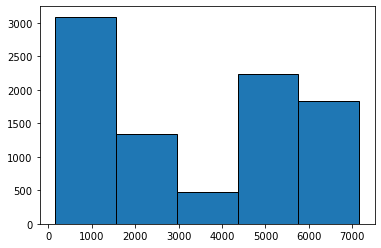

In [27]:
# Analyzing Bandwidth_GB_Year column.
maxBandwidth = np.nanmax(df['Bandwidth_GB_Year'])
minBandwidth = np.nanmin(df['Bandwidth_GB_Year'])
avgBandwidth = np.nanmean(df['Bandwidth_GB_Year'])
medBandwidth = np.nanmedian(df['Bandwidth_GB_Year'])
print("The maximum value in the Bandwidth_GB_Year column is ", maxBandwidth)
print("The minimum value in the Bandwidth_GB_Year column is ", minBandwidth)
print("The arithmetic mean value in the Bandwidth_GB_Year column is ", avgBandwidth)
print("The median value in the Bandwidth_GB_Year column is ", medBandwidth)
pp.hist(df['Bandwidth_GB_Year'], bins=5, edgecolor='black')

In [28]:
# Imputing with median & confirming no nulls remain
df['Bandwidth_GB_Year'].fillna(medBandwidth, inplace=True)
print(df.Bandwidth_GB_Year.isnull().any())

False


In [29]:
# Confirming all nulls have been replaced in the dataframe
print(df.isnull().any())

Customer_id             False
Interaction             False
City                    False
State                   False
County                  False
Zip                     False
Lat                     False
Lng                     False
Population              False
Area                    False
Timezone                False
Job                     False
Children                False
Age                     False
Education               False
Employment              False
Income                  False
Marital                 False
Gender                  False
Churn                   False
Outage_sec_perweek      False
Email                   False
Contacts                False
Yearly_equip_failure    False
Contract                False
Port_modem              False
Tablet                  False
InternetService         False
Phone                   False
Multiple                False
OnlineSecurity          False
OnlineBackup            False
DeviceProtection        False
TechSuppor

In [30]:
# All nulls have been imputed. Review remaining variables for errors and/or outliers.

In [31]:
# Analyzing City column.
print(len(df.City.unique()))

6058


In [32]:
# This list accounts for > 60% of the values in the column. It is unreasonable to review this manually,
# so the column will be left as-is.

In [33]:
# Analyzing State column.
print(df.State.value_counts())
print(len(df.State.value_counts()))

TX    603
NY    558
PA    550
CA    526
IL    413
OH    359
FL    324
MO    310
VA    285
NC    280
MI    279
IA    279
MN    264
WV    247
IN    241
KY    238
GA    238
WI    228
OK    203
KS    195
NJ    190
TN    185
NE    181
AL    181
AR    176
WA    175
MA    172
CO    155
LA    141
MS    126
SC    124
MD    123
ND    118
NM    114
OR    114
ME    112
AZ    112
SD    101
MT     96
NH     85
VT     84
ID     81
AK     77
CT     71
UT     66
NV     48
WY     43
PR     40
HI     35
DE     21
RI     19
DC     14
Name: State, dtype: int64
52


In [34]:
# No apparent errors in state column.

In [35]:
# Analyzing County column.
print(len(df.County.unique()))

1620


In [36]:
# This list accounts for > 16% of the values in the column. It is unreasonable to review this manually,
# so the column will be left as-is.

In [37]:
# Analyzing Zip column.
# The range for zip codes in the US is 00001 to 99950 per
# https://www.spotzi.com/en/maps/united-states/5-digit-postal-codes/
print(min(df.Zip))
print(max(df.Zip))

601
99929


In [38]:
# The minimum and maximum values are within the defined range for zip codes.

In [39]:
# Analyzing Lat and Lng columns.
# Latitude range: -90 to 90, Longitude range: -180 to 180 per
# https://gisgeography.com/latitude-longitude-coordinates/
print(max(df.Lat))
print(min(df.Lat))
print(max(df.Lng))
print(min(df.Lng))

70.64066
17.96612
-65.66785
-171.68815


In [40]:
# These values are within the respective ranges.

(array([7.243e+03, 1.178e+03, 7.340e+02, 4.610e+02, 2.090e+02, 1.050e+02,
        3.500e+01, 2.400e+01, 8.000e+00, 3.000e+00]),
 array([     0.,  11185.,  22370.,  33555.,  44740.,  55925.,  67110.,
         78295.,  89480., 100665., 111850.]),
 <BarContainer object of 10 artists>)

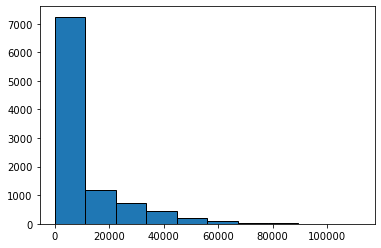

In [41]:
# Analyzing Popluation column.
pp.hist(df.Population, bins=10, edgecolor='black')

In [42]:
# Analyzing the 20 largest Population values.
cityPopSorted = df[['City', 'State','Population']].sort_values(by='Population', ascending=False)
print(cityPopSorted.head(20))

                    City State  Population
CaseOrder                                 
8140             Chicago    IL      111850
8321               Bronx    NY      103732
6289        Bell Gardens    CA      102433
1776            Brooklyn    NY       98660
6611             Fontana    CA       96575
8131         Los Angeles    CA       96436
7442           Riverside    CA       94512
2403           Riverside    CA       94512
1894             Chicago    IL       94395
4350       Lawrenceville    GA       90675
204              Chicago    IL       90517
1399            Brooklyn    NY       89075
443             Brooklyn    NY       88349
5899             Cypress    TX       88344
9988             Chicago    IL       87509
6465             Chicago    IL       87509
1212           La Puente    CA       87240
158          League City    TX       86926
8080           San Diego    CA       86811
7455         Watsonville    CA       86703


In [43]:
# These values correspond to highly populated areas and do not appear to be
# a recording error.

In [44]:
# Analyzing Timezone column.
print(df.Area.value_counts())
print(df.Timezone.value_counts())

Suburban    3346
Rural       3327
Urban       3327
Name: Area, dtype: int64
America/New_York                  4072
America/Chicago                   3672
America/Los_Angeles                887
America/Denver                     552
America/Detroit                    265
America/Indiana/Indianapolis       186
America/Phoenix                    104
America/Boise                       57
America/Anchorage                   55
America/Puerto_Rico                 40
Pacific/Honolulu                    35
America/Menominee                   16
America/Nome                        12
America/Kentucky/Louisville         10
America/Sitka                        8
America/Indiana/Vincennes            6
America/Indiana/Tell_City            6
America/Toronto                      5
America/Indiana/Petersburg           4
America/Juneau                       2
America/North_Dakota/New_Salem       2
America/Indiana/Winamac              1
America/Indiana/Marengo              1
America/Indiana/Knox       

In [45]:
# The outputs are as expected.

In [46]:
# Analyzing Job column.
print(len(df.Job.unique()))
print(df.Job.head(20))

639
CaseOrder
1       Environmental health practitioner
2                  Programmer, multimedia
3                 Chief Financial Officer
4                               Solicitor
5                     Medical illustrator
6                Chief Technology Officer
7                  Surveyor, hydrographic
8       Sales promotion account executive
9          Teaching laboratory technician
10               Museum education officer
11     Teacher, special educational needs
12                   Maintenance engineer
13    Engineer, broadcasting (operations)
14              Learning disability nurse
15                    Automotive engineer
16                 Amenity horticulturist
17                 Applications developer
18                           Immunologist
19                   Engineer, electrical
20                    Broadcast presenter
Name: Job, dtype: object


In [47]:
# These values are self-reported and categorical. They may no longer be true,
# or may never have been true. With such a wide variance in entries, it would
# be challenging to draw any reasonable conclusions based on this variable. 
# Therefore, it will be dropped.

In [48]:
# Dropping Job column & confirming it has been dropped.
print(df.shape)
df.drop(columns='Job', inplace=True)
print(df.shape)

(10000, 49)
(10000, 48)


In [49]:
# Analyzing Education, Employment, Marital, Gender, and Churn columns.

print(df.Education.value_counts())
print(df.Employment.value_counts())
print(df.Marital.value_counts())
print(df.Gender.value_counts())
print(df.Churn.value_counts())

Regular High School Diploma                 2421
Bachelor's Degree                           1703
Some College, 1 or More Years, No Degree    1562
9th Grade to 12th Grade, No Diploma          870
Master's Degree                              764
Associate's Degree                           760
Some College, Less than 1 Year               652
Nursery School to 8th Grade                  449
GED or Alternative Credential                387
Professional School Degree                   198
No Schooling Completed                       118
Doctorate Degree                             116
Name: Education, dtype: int64
Full Time     5992
Part Time     1042
Retired       1011
Unemployed     991
Student        964
Name: Employment, dtype: int64
Divorced         2092
Widowed          2027
Separated        2014
Never Married    1956
Married          1911
Name: Marital, dtype: int64
Female                  5025
Male                    4744
Prefer not to answer     231
Name: Gender, dtype: int64
No  

In [50]:
# There are no apparent errors in these outputs.

47.04928
-1.348571
11.452955137651369
10.20289623


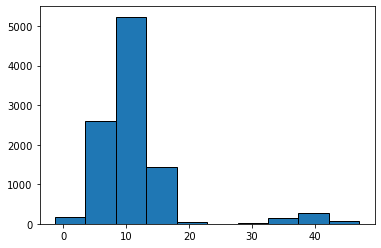

In [51]:
# Analyzing Outage_sec_perweek
print(df.Outage_sec_perweek.max())
print(df.Outage_sec_perweek.min())
print(df.Outage_sec_perweek.mean())
print(df.Outage_sec_perweek.median())
pp.hist(df.Outage_sec_perweek, bins=10, edgecolor='black')
pp.show()

In [52]:
# It appears that there are some negative values for time which cannot be true.
# There is a small grouping of values on the high end but the maximum value is
# still reasonable.

In [53]:
negOutage = df.query('Outage_sec_perweek < 0')
print(negOutage.shape)
print(negOutage.Outage_sec_perweek)

(11, 48)
CaseOrder
1905   -1.195428
1998   -0.339214
3070   -0.206145
3630   -0.152845
4168   -1.348571
4185   -0.352431
4428   -1.099934
6094   -0.787115
6464   -0.144644
6578   -0.527396
8195   -0.214328
Name: Outage_sec_perweek, dtype: float64


In [54]:
# There are only 11 entries that are negative, all of which are close to zero.
# I will replace these with zero as they are likely due to some recording error
# and such a minor change will not dramatically affect the data set.

In [55]:
# Replacing negative values in Outage_sec_perweek
negOutageIds = negOutage.Customer_id
df.loc[df.Customer_id.isin(negOutageIds), 'Outage_sec_perweek'] = '0'

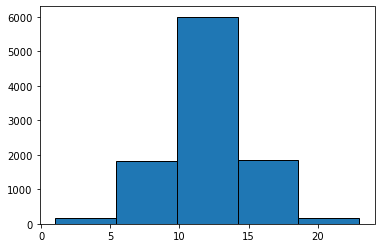

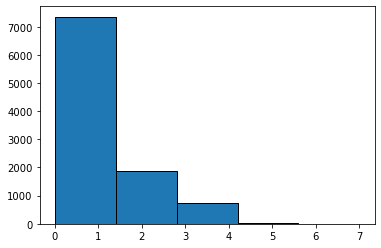

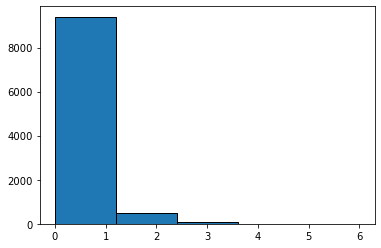

In [56]:
# Analyzing Email, Contacts, and Yearly_equip_failure columns.
pp.hist(df.Email, bins=5, edgecolor='black')
pp.show()

pp.hist(df.Contacts, bins=5, edgecolor='black')
pp.show()

pp.hist(df.Yearly_equip_failure, bins=5, edgecolor='black')
pp.show()

In [57]:
# Email appears normally distributed. Contacts and Yearly_equip_failure are skewed right, but reasonable.

In [58]:
# Analyzing several categorical columns using value_counts
cols = ['Contract', 'Port_modem', 'Tablet', 'InternetService', 'Multiple',
        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'StreamingTV',
        'StreamingMovies', 'PaperlessBilling', 'PaymentMethod']

for col in cols:
   print(df[col].value_counts())

Month-to-month    5456
Two Year          2442
One year          2102
Name: Contract, dtype: int64
No     5166
Yes    4834
Name: Port_modem, dtype: int64
No     7009
Yes    2991
Name: Tablet, dtype: int64
Fiber Optic    4408
DSL            3463
None           2129
Name: InternetService, dtype: int64
No     5392
Yes    4608
Name: Multiple, dtype: int64
No     6424
Yes    3576
Name: OnlineSecurity, dtype: int64
No     5494
Yes    4506
Name: OnlineBackup, dtype: int64
No     5614
Yes    4386
Name: DeviceProtection, dtype: int64
No     5071
Yes    4929
Name: StreamingTV, dtype: int64
No     5110
Yes    4890
Name: StreamingMovies, dtype: int64
Yes    5882
No     4118
Name: PaperlessBilling, dtype: int64
Electronic Check            3398
Mailed Check                2290
Bank Transfer(automatic)    2229
Credit Card (automatic)     2083
Name: PaymentMethod, dtype: int64


In [59]:
# The outputs are as expected.

(array([1166., 4189., 2960., 1488.,  197.]),
 array([ 77.50523 , 125.179904, 172.854578, 220.529252, 268.203926,
        315.8786  ]),
 <BarContainer object of 5 artists>)

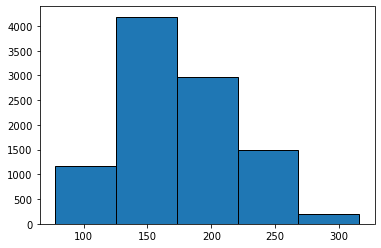

In [60]:
# Analyzing MonthlyCharge column.
pp.hist(df.MonthlyCharge, bins=5, edgecolor='black')

In [61]:
# There are no apparent errors.

In [62]:
cols2 = ['Response', 'Fix', 'Replacement', 'Reliability', 'Options',
         'Respectful', 'Courteous', 'Listening']

for col in cols2:
    print(df[col].value_counts())

3    3448
4    3358
2    1393
5    1359
1     224
6     199
7      19
Name: Response, dtype: int64
3    3415
4    3412
5    1368
2    1360
1     217
6     215
7      13
Name: Fix, dtype: int64
3    3435
4    3410
2    1424
5    1313
6     203
1     202
7      12
8       1
Name: Replacement, dtype: int64
4    3452
3    3430
2    1350
5    1335
1     221
6     203
7       9
Name: Reliability, dtype: int64
3    3462
4    3417
2    1378
5    1321
1     206
6     204
7      12
Name: Options, dtype: int64
3    3445
4    3333
2    1427
5    1382
6     210
1     190
7      12
8       1
Name: Respectful, dtype: int64
4    3456
3    3446
5    1335
2    1309
6     224
1     219
7      11
Name: Courteous, dtype: int64
3    3461
4    3400
2    1378
5    1335
1     206
6     205
7      14
8       1
Name: Listening, dtype: int64


In [63]:
# All outputs are as expected.

In [64]:
# Exporting cleaned data set to CSV
df.to_csv(r'C:/Users/sigsp/OneDrive/Desktop/D206 Data Cleaning/D206 PA/churn_data_cleaned.csv')